# Import dependencies

In [21]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.metrics import silhouette_score

# Load Data

In [2]:
data_embed = pd.read_csv("./term_embeddings/vectorized_term_embeddings_4k.csv")
data_embed.head()

0         1         2         3         4         5         6  \
0 -0.235717 -0.034357  0.059340  0.297741  0.413503 -0.005965  0.053272   
1 -0.178516  0.002904  0.131155  0.332376  0.247463  0.099109 -0.000515   
2 -0.330687 -0.031855  0.105278  0.078271  0.195134 -0.136877  0.117263   
3 -0.281114 -0.042354  0.105358  0.152034  0.230870 -0.142952  0.144465   
4 -0.304600 -0.016233  0.152511  0.173860  0.161872 -0.073577  0.122591   

          7         8         9  ...       758       759       760       761  \
0 -0.109700  0.191787  0.184964  ...  0.222023 -0.038877 -0.471914  0.768315   
1  0.026755  0.152213  0.175770  ...  0.283444 -0.155591 -0.345533  0.806833   
2 -0.054845  0.206244  0.265202  ...  0.215846 -0.030670 -0.520877  0.729626   
3 -0.065642  0.168137  0.245674  ...  0.188485 -0.022974 -0.496699  0.746730   
4 -0.008369  0.165817  0.273474  ...  0.204433 -0.045393 -0.448815  0.680492   

        762       763       764       765       766       767  
0 -0.488685  0.120664  0.782061 -0.179443 -0.428450  0.461683  
1 -0.311759  0.207827  0.600389 -0.149813 -0.418629  0.541288  
2 -0.386960  0.177576  0.676565 -0.328219 -0.565267  0.506224  
3 -0.406173  0.157490  0.685346 -0.276632 -0.548756  0.495335  
4 -0.389678  0.141336  0.665190 -0.325107 -0.504376  0.517802  

[5 rows x 768 columns]

In [3]:
all_data = pd.read_csv("../tests_17_ann_and_terms/article_v2_2_term_var_to_best_strategy/prepare_data/data_steps/steps_vars_term_str.csv", delimiter=',')

# leave only unique terms
print(f"Count all terms: {len(all_data)}")

print(f"max RI steps count: {max(all_data['RI_steps_num'])}")
print(f"max LO steps count: {max(all_data['LO_steps_num'])}")

# RI == LO -> 0
# RI > LO -> 1
# RI < LO -> 2
class_RI_LO = ["RI = LO" if los == ris else "RI < LO" if ris < los else "LO < RI" for los, ris in zip(all_data["LO_steps_num"].tolist(), all_data["RI_steps_num"].tolist())]

print(f"Count terms data samples: {len(class_RI_LO)}")

Count all terms: 4282
max RI steps count: 1000
max LO steps count: 219
Count terms data samples: 4282


# k-means clustering

100%|██████████| 18/18 [03:28<00:00, 11.61s/it]


<AxesSubplot: >

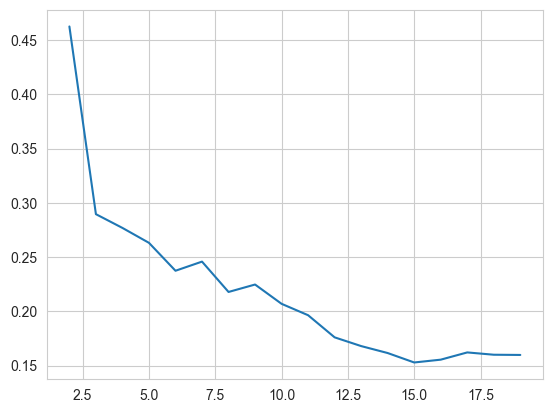

In [8]:
# Use elbow method to define optimal clusters count
K_nums = range(2, 20)
fits = []
scores = []


for k in tqdm(K_nums):
	# train the model for current value of k on training data
	model = KMeans(n_clusters = k, random_state = 0, n_init=100).fit(data_embed)
    
	# append the model to fits
	fits.append(model)
    
	# Append the silhouette score to scores
	scores.append(silhouette_score(data_embed, model.labels_, metric='euclidean'))
    
sns.lineplot(x = K_nums, y = scores)

By image the optimal number of clusters is 15 (using elbow method).
But we try 2, 3 and 15 clusters and plot them

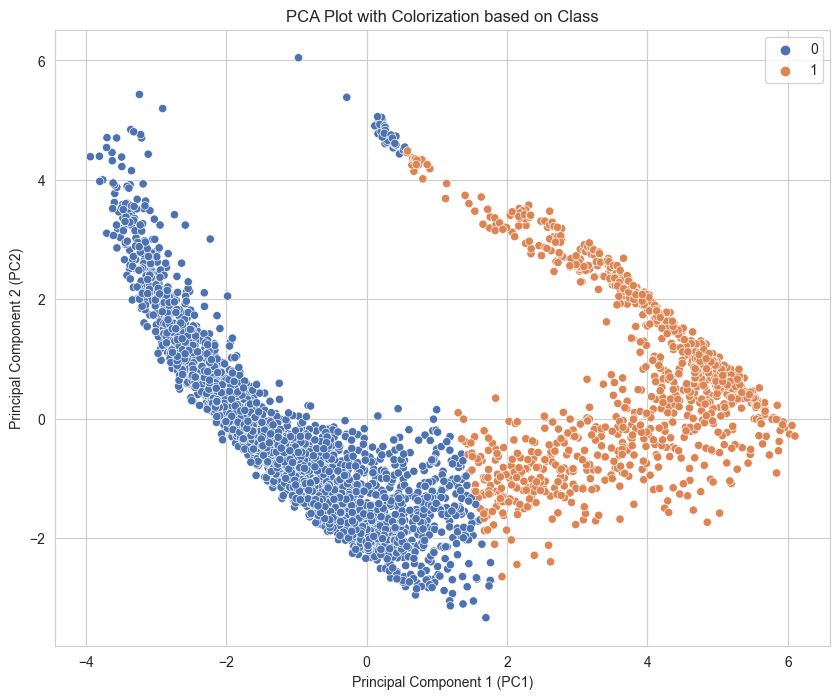

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


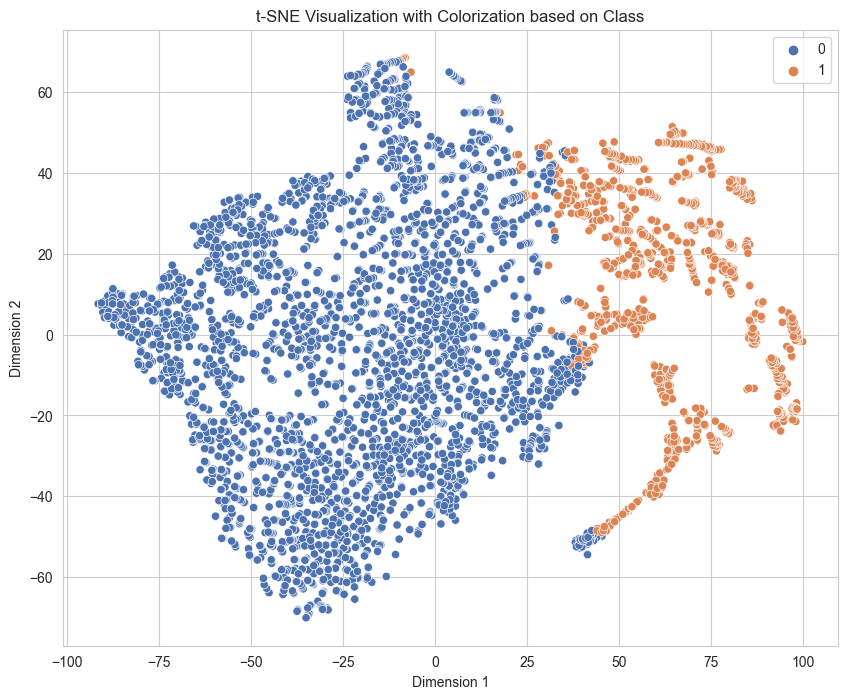

In [18]:
# try 2 clusters
def visualize_clusters(model_):
    pca = PCA(n_components=2)  # Set the number of components as needed
    principal_components = pca.fit_transform(data_embed)
    
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['class'] = model_.labels_
    
    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette="deep")
    plt.title('PCA Plot with Colorization based on Class')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend()
    plt.show()
    
    
    tsne = TSNE(n_components=2, random_state=42)
    embedded_data = tsne.fit_transform(data_embed)
    
    tsne_df = pd.DataFrame(data=embedded_data, columns=['Dimension 1', 'Dimension 2'])
    tsne_df['class'] = model_.labels_
    
    # Plot the PCA results with colorization based on the 'class' column
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='class', data=tsne_df, palette="deep")
    plt.title('t-SNE Visualization with Colorization based on Class')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()
    
    
model = KMeans(n_clusters=2, random_state=0, n_init=100).fit(data_embed)
visualize_clusters(model)

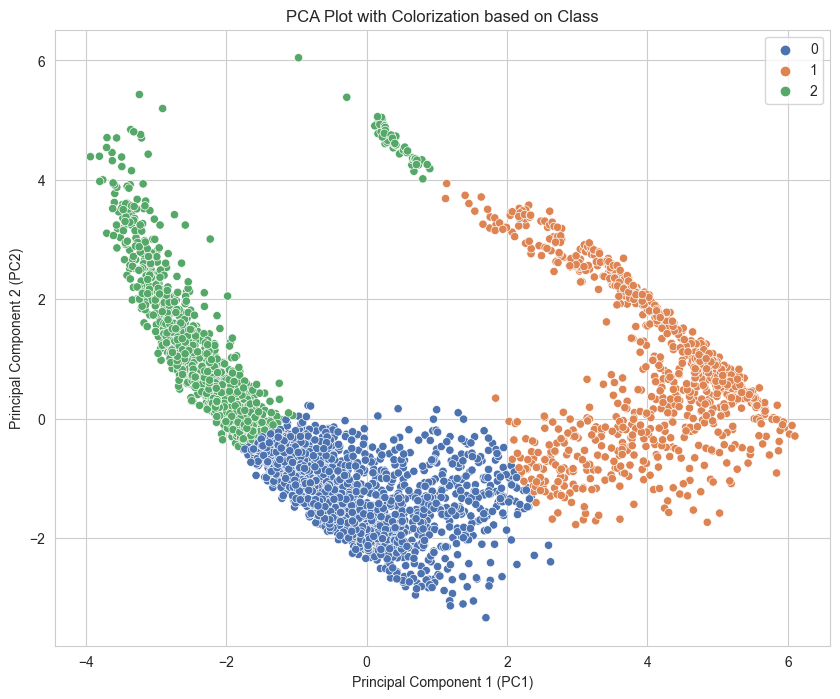

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


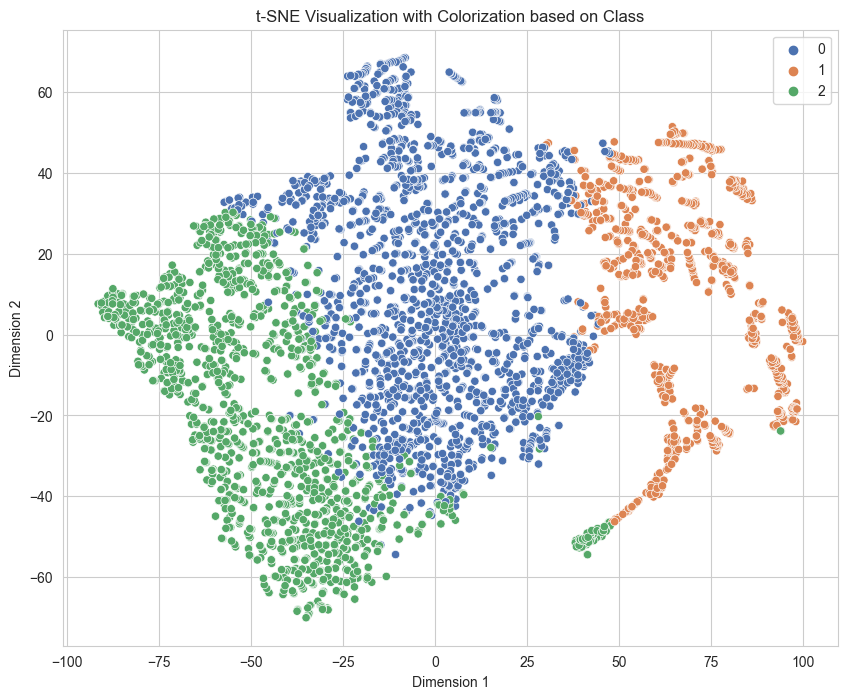

In [19]:
model = KMeans(n_clusters=3, random_state=0, n_init=100).fit(data_embed)
visualize_clusters(model)

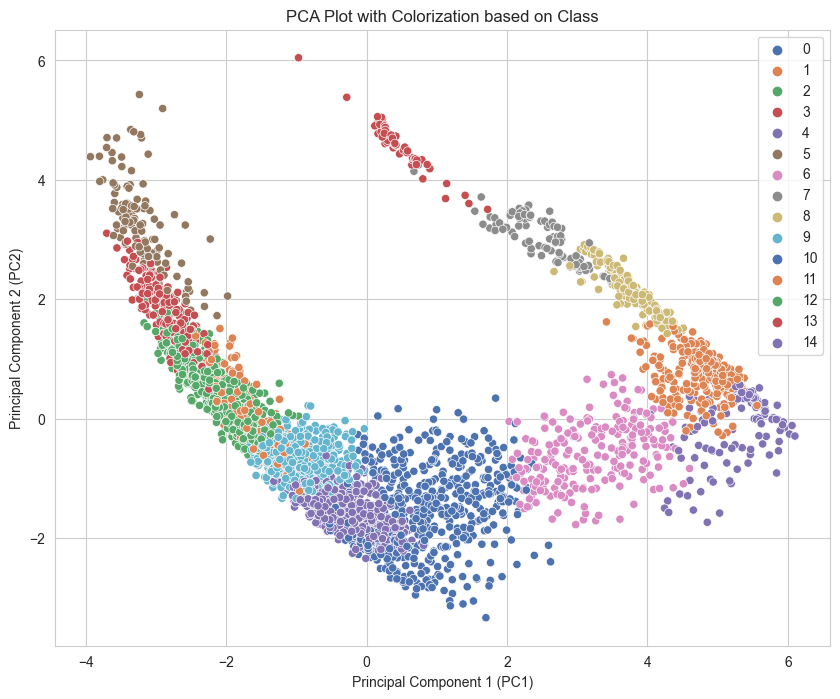

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


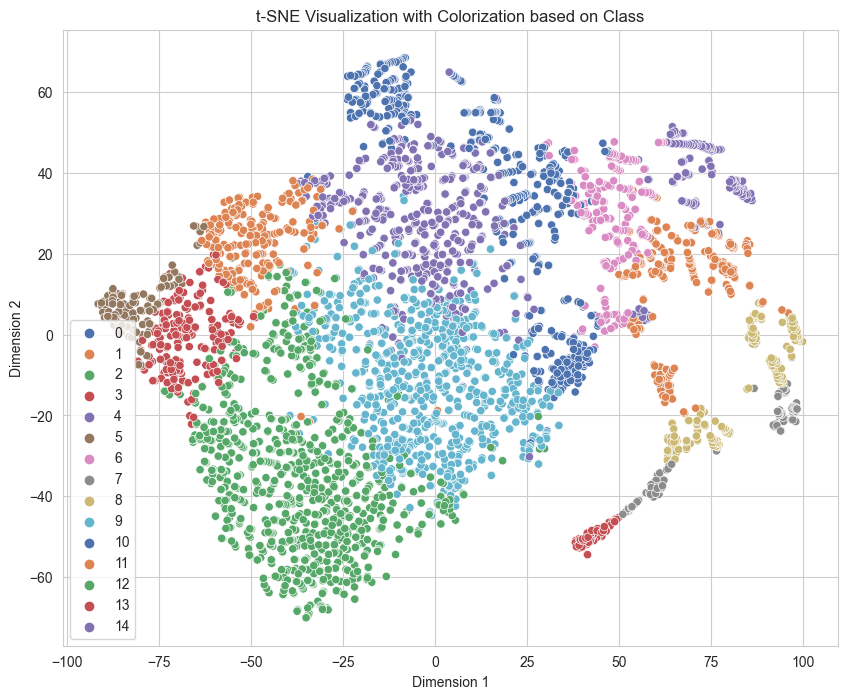

In [20]:
model = KMeans(n_clusters=15, random_state=0, n_init=100).fit(data_embed)
visualize_clusters(model)

# DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 4264
2


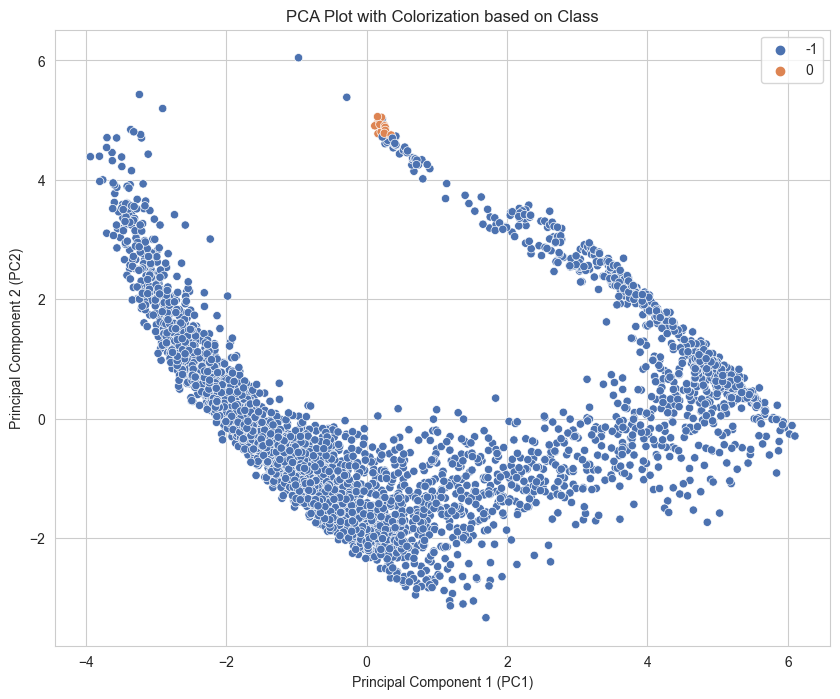

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


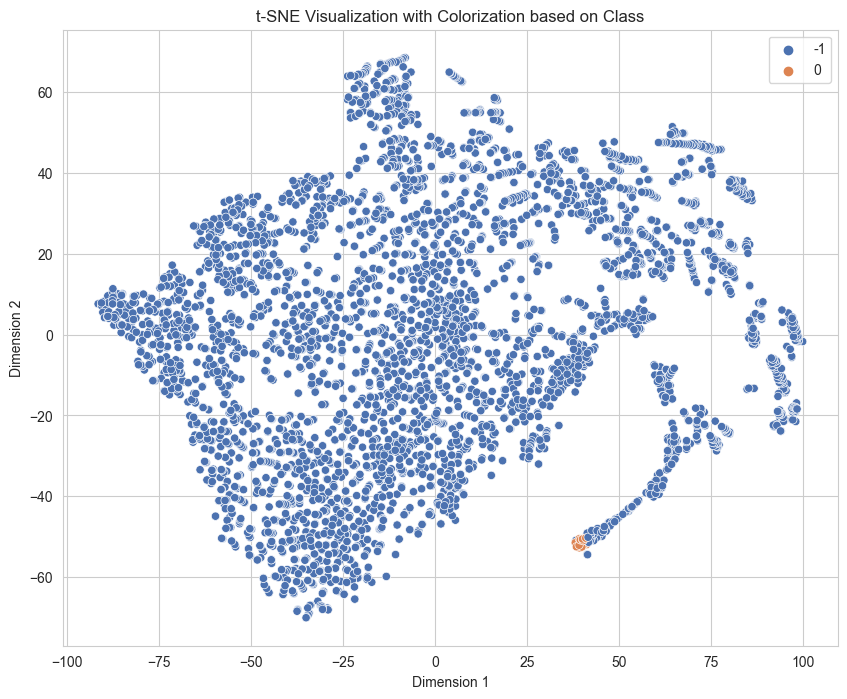

In [25]:
# DEFAULT
# epsilon = 0.3 ~ max distance between 2 samples
# metric = Euclidian
# min_samples = 10 ~ the number of samples (or total weight) in a neighborhood 
#                    for a point to be considered as a core point

dbscan_model = DBSCAN(eps=0.3, min_samples=10).fit(data_embed)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
n_noise_ = list(dbscan_model.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(len(set(dbscan_model.labels_)))
visualize_clusters(dbscan_model)

Estimated number of clusters: 3
Estimated number of noise points: 114
4


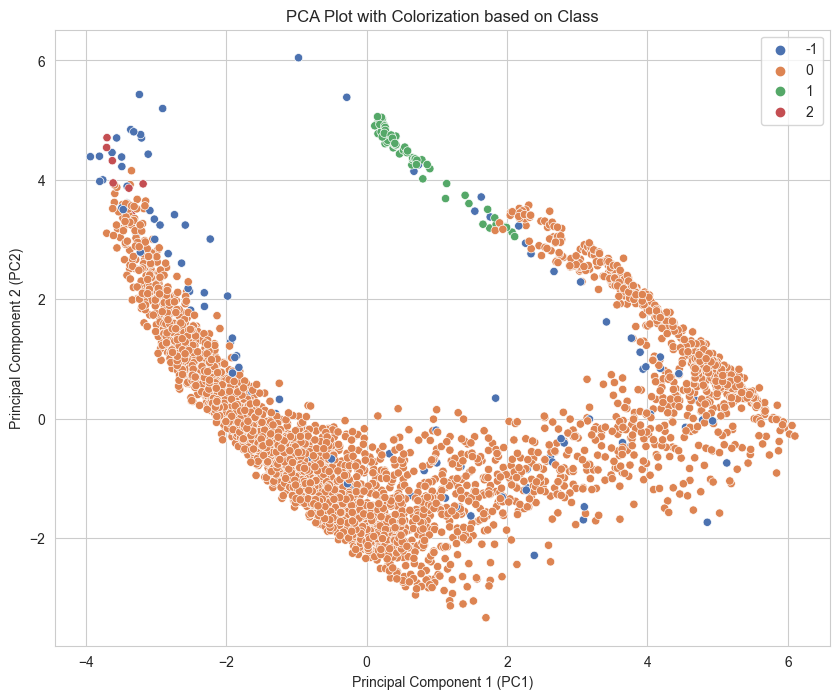

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


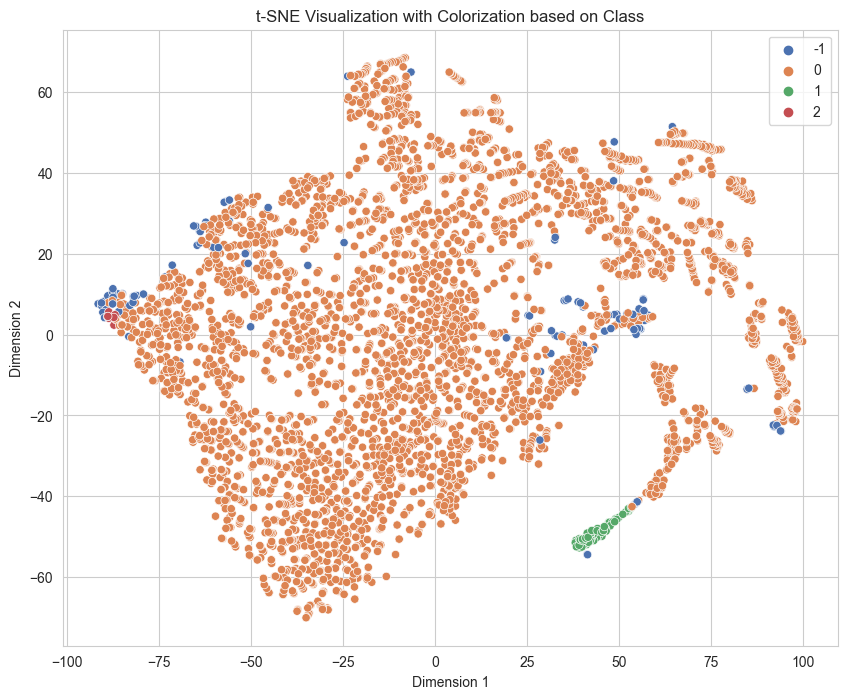

In [35]:
# epsilon = 1.7 ~ max distance between 2 samples
# metric = Euclidian
# min_samples = 10 ~ the number of samples (or total weight) in a neighborhood 
#                    for a point to be considered as a core point

dbscan_model = DBSCAN(eps=1.7, min_samples=10).fit(data_embed)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
n_noise_ = list(dbscan_model.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(len(set(dbscan_model.labels_)))
visualize_clusters(dbscan_model)

Estimated number of clusters: 6
Estimated number of noise points: 1051
7


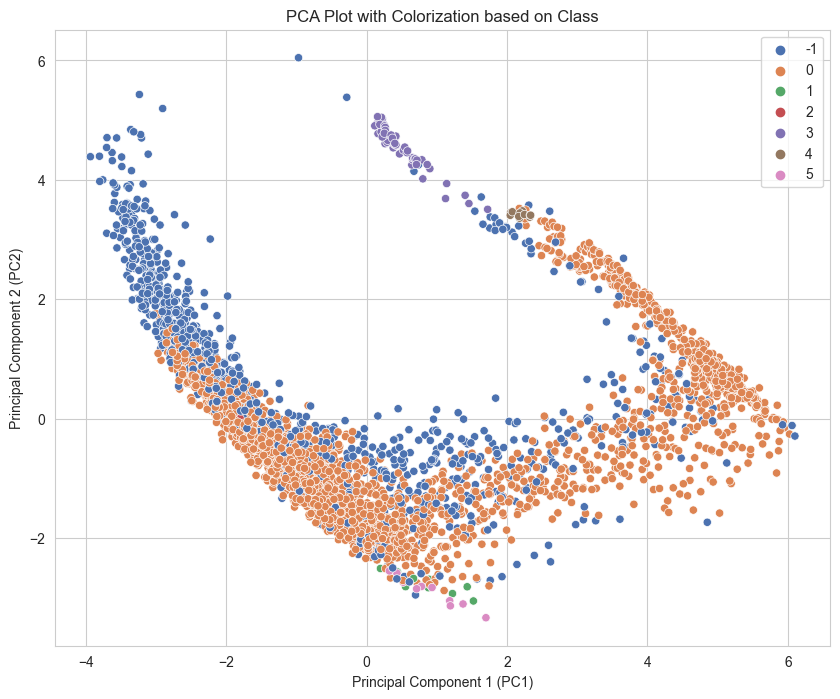

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


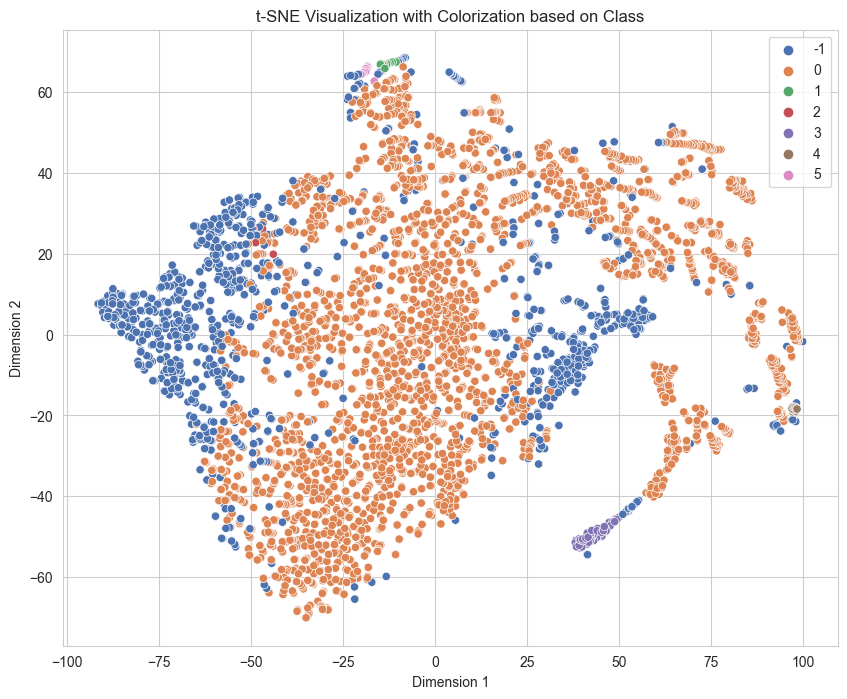

In [39]:
# epsilon = 1.25 ~ max distance between 2 samples
# metric = Euclidian
# min_samples = 10 ~ the number of samples (or total weight) in a neighborhood 
#                    for a point to be considered as a core point

dbscan_model = DBSCAN(eps=1.25, min_samples=10).fit(data_embed)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
n_noise_ = list(dbscan_model.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(len(set(dbscan_model.labels_)))
visualize_clusters(dbscan_model)

Estimated number of clusters: 5
Estimated number of noise points: 1100
6


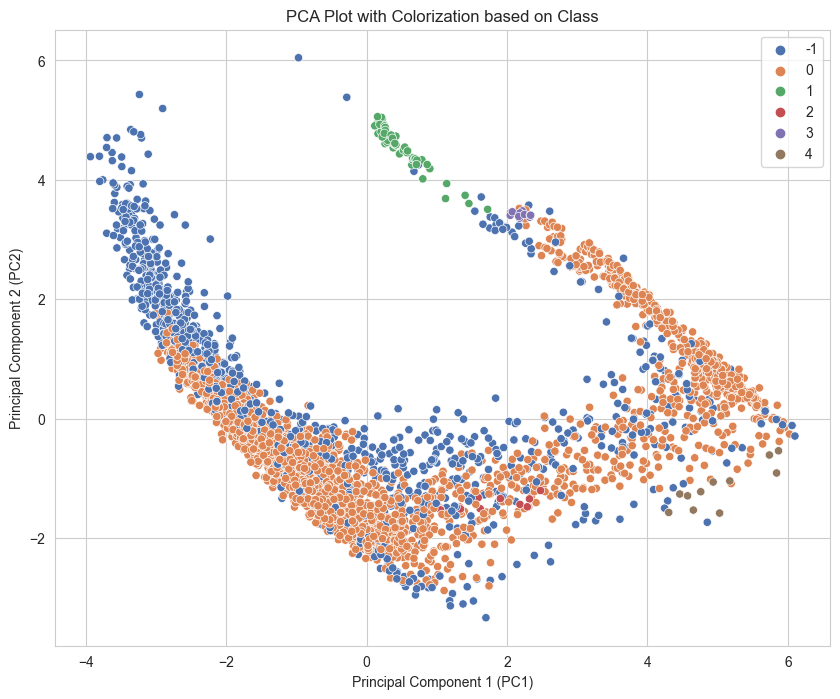

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


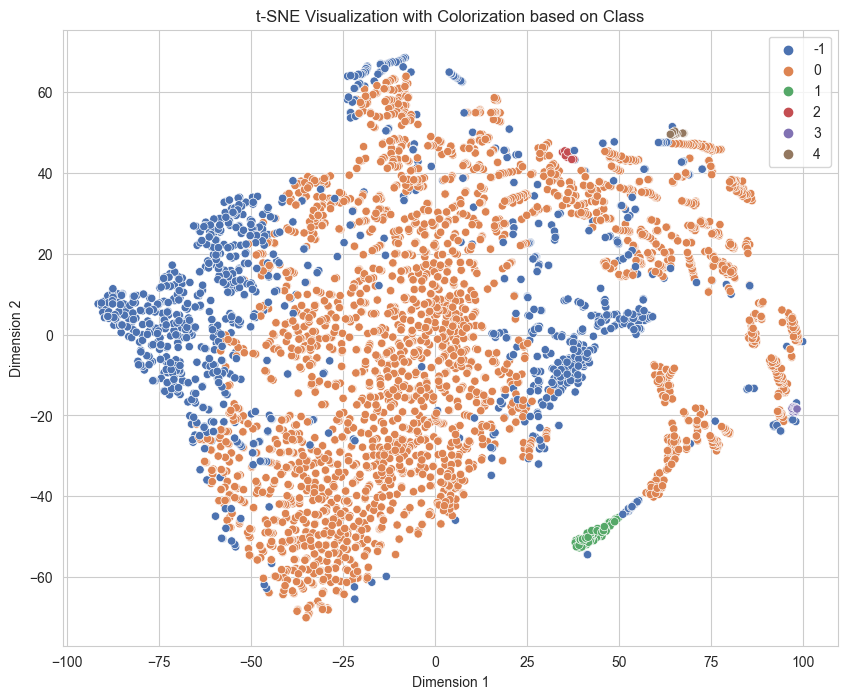

In [50]:
# epsilon = 0.3 ~ max distance between 2 samples
# metric = cosine
# min_samples = 10 ~ the number of samples (or total weight) in a neighborhood 
#                    for a point to be considered as a core point

dbscan_model = DBSCAN(eps=0.002, min_samples=10, metric='cosine').fit(data_embed)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_model.labels_)) - (1 if -1 in dbscan_model.labels_ else 0)
n_noise_ = list(dbscan_model.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(len(set(dbscan_model.labels_)))
visualize_clusters(dbscan_model)